Iniciando projeto do capítulo 2:

In [1]:
from platform import python_version
print(f"Versão Python: {python_version()}")


Versão Python: 3.12.4


Buscar dados:

In [2]:
import os
import tarfile
import pandas as pd
from six.moves import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
  tgz_path = os.path.join(housing_path, "housing.tgz")
  if not os.path.isfile(tgz_path):
    if not os.path.isdir(housing_path):
      os.makedirs(housing_path)
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()



In [3]:
fetch_housing_data()

Carregando dados com Pandas:

In [4]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    print(f"Loading file from: {csv_path}")  # Depuração
    return pd.read_csv(csv_path)

In [5]:
housing = load_housing_data()
housing.head()

Loading file from: datasets\housing\housing.csv


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Descrição rápida dos dados:

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Resumo dos atributos numéricos:

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Traçando histograma:

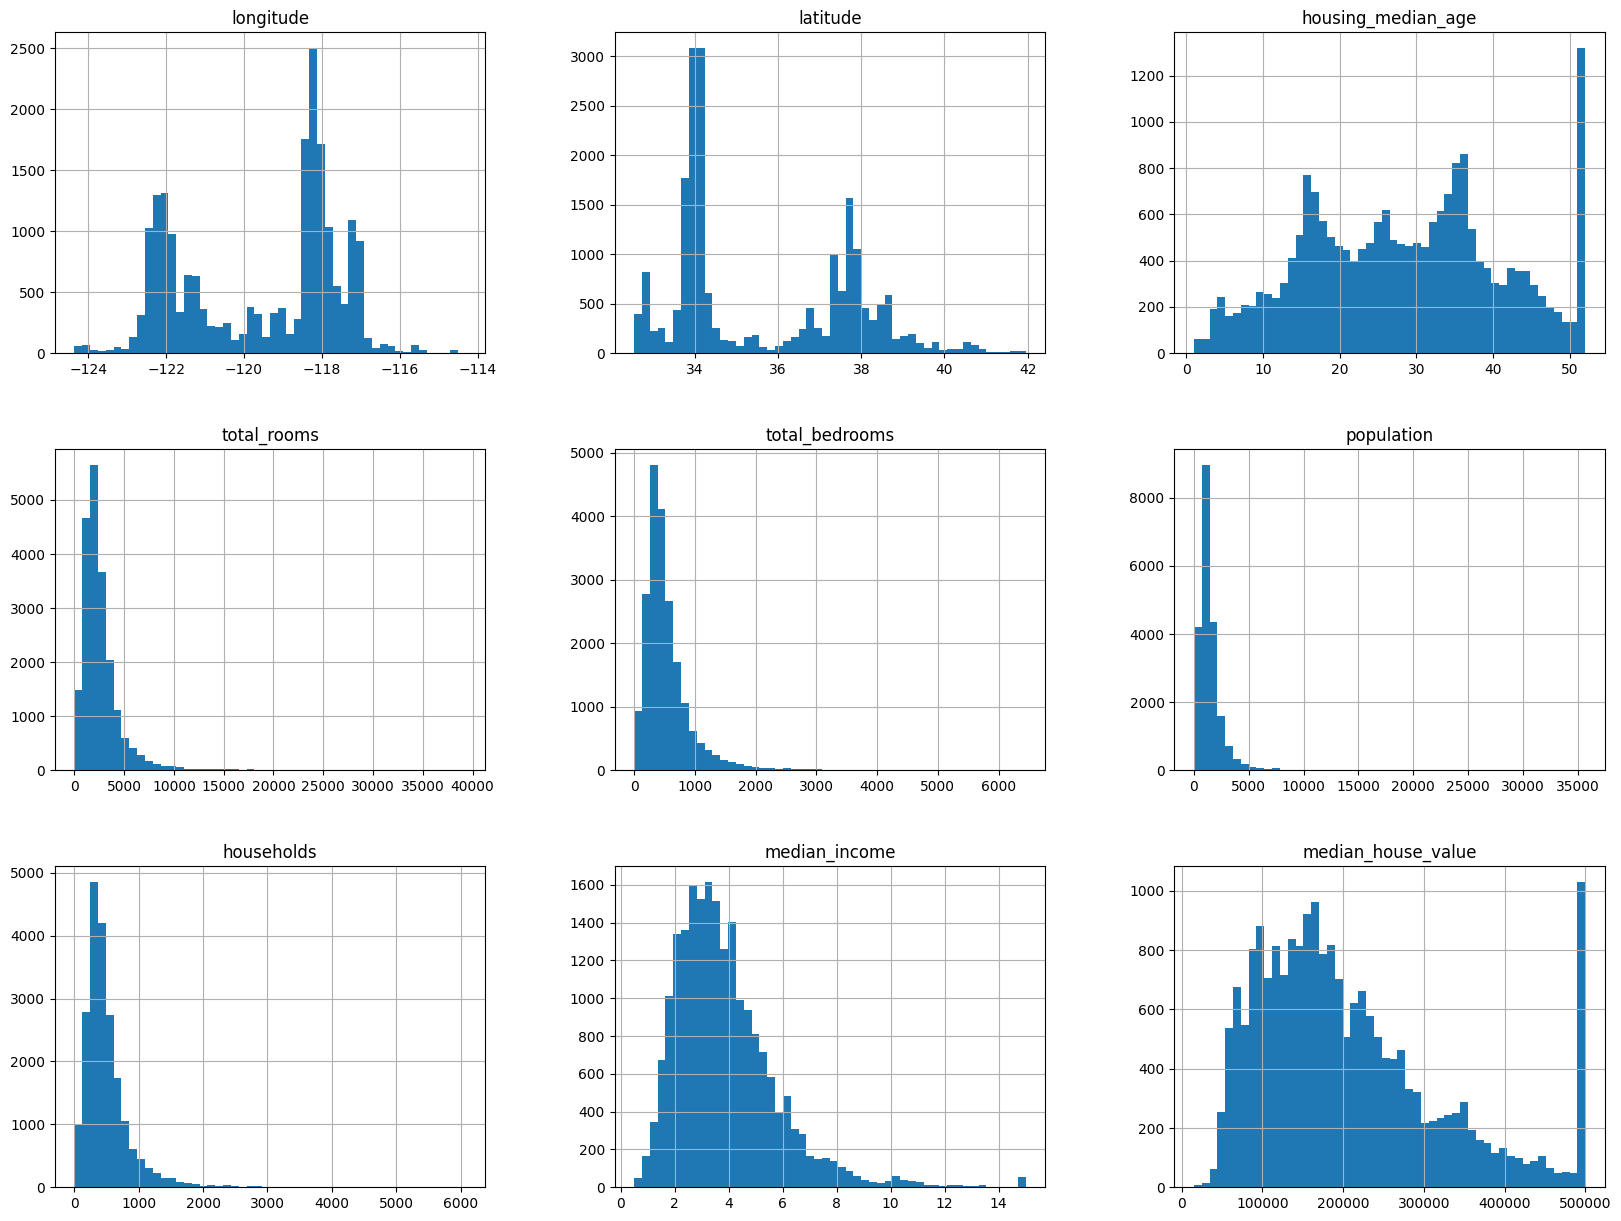

In [8]:
%matplotlib inline 
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

Criando conjuntos de testes(não tão eficaz):

In [9]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

Usando a função:

In [10]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")


16512 train + 4128 test


Criando um conjunto de teste mais consistente:

In [11]:
import hashlib

def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio
    
def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [12]:
housing_with_id = housing.reset_index() # adiciona uma coluna ‘index`
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

Usando Scikit-Learn para fazer quase a mesma coisa que split_train_test definida logo a cima:

In [13]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

criando um atributo da categoria da
renda dividindo a renda média por 1,5 (para limitar o número de categorias da renda)
e arredondando com a utilização do ceil (para ter categorias discretas) e, mesclando todas as categorias maiores que 5, na categoria 5:

In [14]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0)#retirado "inplace=True" devido a mudanças na 3.0

0        5.0
1        5.0
2        5.0
3        4.0
4        3.0
        ... 
20635    2.0
20636    2.0
20637    2.0
20638    2.0
20639    2.0
Name: income_cat, Length: 20640, dtype: float64

Amostragem estratificada vom base na categoria de renda:

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [16]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3.0     0.350533
2.0     0.318798
4.0     0.176357
5.0     0.069041
1.0     0.039729
6.0     0.025678
7.0     0.009205
8.0     0.005087
11.0    0.002422
9.0     0.002422
10.0    0.000727
Name: count, dtype: float64

Removendo atributo "income_cat" para que os dados voltem ao estado original:

In [17]:
for set_ in(strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

##Cópia para treinar sem prejudicar conjunto de treinamento:

In [18]:
housing = strat_train_set.copy()

Visualização de dados Geográficos:

<Axes: xlabel='longitude', ylabel='latitude'>

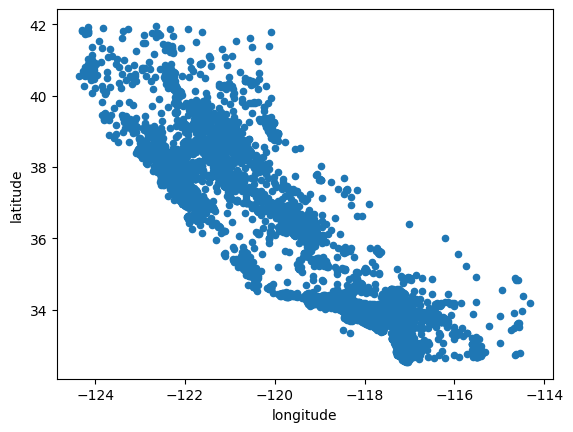

In [19]:
housing.plot(kind="scatter", x="longitude", y="latitude")

Os dados acimas mostram algo parecido com a Califórnia, mas por não conseguir um padrão específico
Definimos alpha em 0,1 para facilitar a visualização de locais com alta densidade de ponto de dados.

<Axes: xlabel='longitude', ylabel='latitude'>

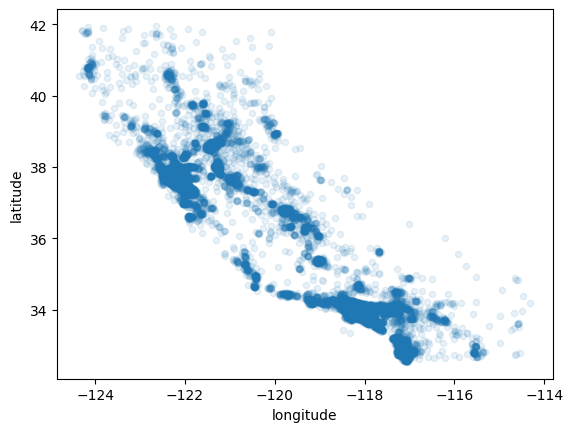

In [20]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha= 0.1)

Preços do  setor imobiliário:

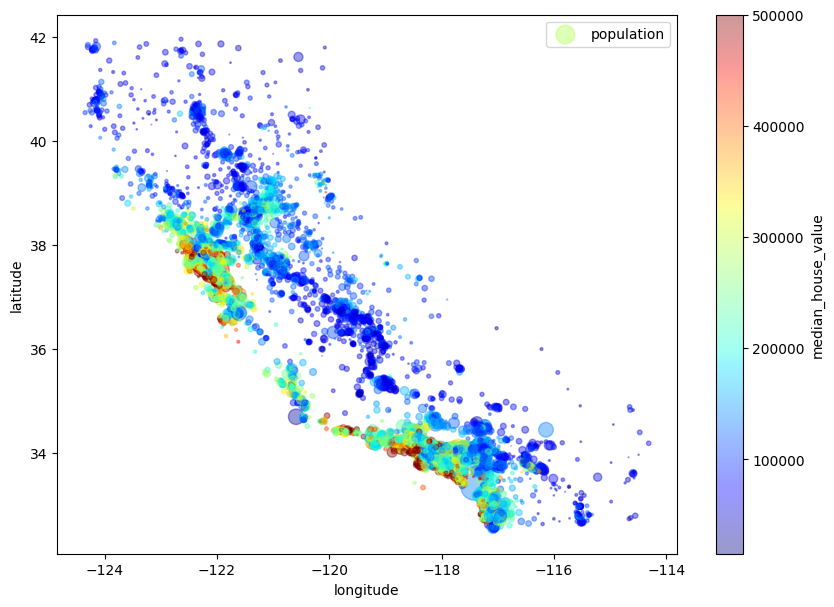

In [21]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend() 

Isto acima está mostrando que os preços do setor imobiliário estão muito relacionados à
localização (por exemplo, perto do oceano) e à densidade populacional.

##Coeficiente de correlação:

In [22]:
corr_matrix = housing.select_dtypes(include=[np.number]).corr()
#filtrou-se as colunas numéricas antes de calcular a matriz de correlação.
#trocando "corr_matrix = housing.corr()" pelo codigo deste trecho

In [23]:
corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.687474
total_rooms           0.135989
housing_median_age    0.111770
households            0.065841
total_bedrooms        0.049177
population           -0.024765
longitude            -0.045056
latitude             -0.144684
Name: median_house_value, dtype: float64

##Outra maneira de verificar correlação entre atributos(scatter_matrix):

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

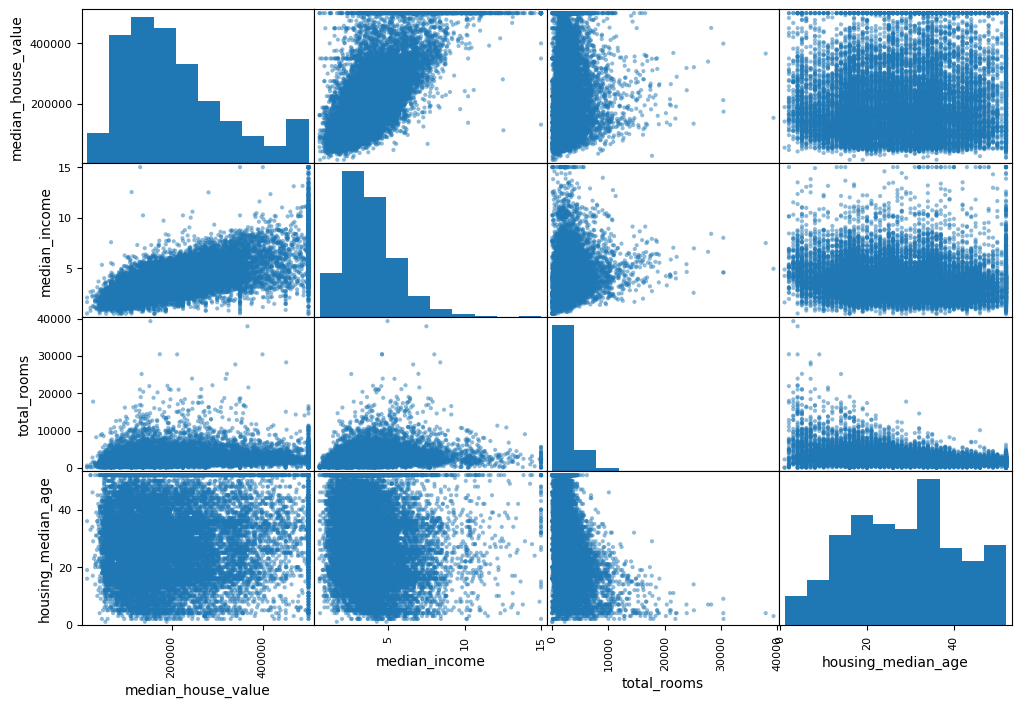

In [24]:
from pandas.plotting import scatter_matrix #pandas.tools.plotting foi descontinuada, se importa diretamente de pandas.plotting
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))


##Usando renda média como atributo para prever o valor médio de habitação

<Axes: xlabel='median_income', ylabel='median_house_value'>

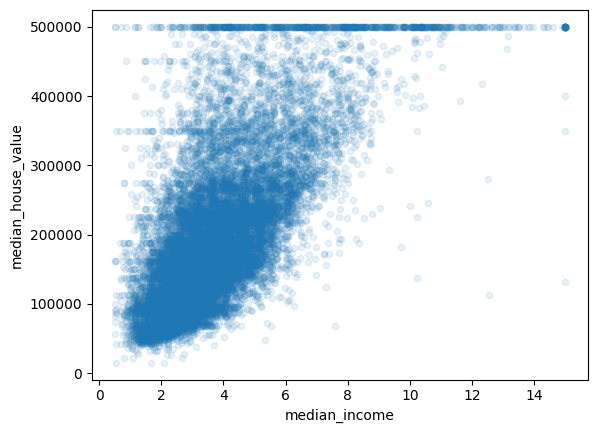

In [25]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
alpha=0.1)

In [26]:
#Criando novos atributos para novas combinações
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [27]:
corr_matrix = housing.select_dtypes(include=[np.number]).corr()
#filtrou-se as colunas numéricas antes de calcular a matriz de correlação.
#trocando "corr_matrix = housing.corr()" pelo codigo deste trecho
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687474
rooms_per_household         0.145750
total_rooms                 0.135989
housing_median_age          0.111770
households                  0.065841
total_bedrooms              0.049177
population_per_household   -0.021844
population                 -0.024765
longitude                  -0.045056
latitude                   -0.144684
bedrooms_per_room          -0.259679
Name: median_house_value, dtype: float64

##########################################################################
##########################################################################

In [28]:
#copiando strat_train_set mais uma vez,
#e separando os previsores e os rótulos, uma vez que não
#queremos necessariamente aplicar as mesmas transformações às previsões e aos 
#valores-alvo (observe que drop() cria uma cópia dos dados e não afeta strat_train_set):

housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

Limpando os dados das caracteristicas com dados faltando, as opções são:
• Livrar-se dos bairros correspondentes;
• Livrar-se de todo o atributo;
• Definir valores para algum valor (zero, a média, intermediária, etc.).

In [29]:
#housing.dropna(subset=["total_bedrooms"]) # opção 1
#housing.drop("total_bedrooms", axis=1) # opção 2
median = housing["total_bedrooms"].median() # opção 3
housing["total_bedrooms"] = housing["total_bedrooms"].fillna(median)

Usando o Scikit-Learn que fornece uma classe acessível para cuidar dos valores faltantes: 
Imputer(livro/descontinuado) ou SimpleImputer(versões mais atuais).

In [30]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [31]:
#a media so pode ser calculada em atributos numéricos, etão fazemos uma copia
#dos dados sem ocean_proximity
housing_num = housing.drop("ocean_proximity", axis=1)

In [32]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

Aplicando o imputer a todos os atributos numéricos para ter certeza
que não haverá valores faltando em novos futuros dados:

In [33]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2122.    ,  434.    , 1166.    ,
        408.    ,    3.5409])

In [34]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2122.    ,  434.    , 1166.    ,
        408.    ,    3.5409])

usando este imputer "treinado" substituindo os valores perdidos pelas 
médias aprendidadas afim de transformar o conjunto de treinamento:

In [35]:
X = imputer.transform(housing_num)

In [36]:
#colocando de volta em um DataFrame Pandas
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

##Manipulando texto e atributos categóricos

In [37]:
housing_cat = housing["ocean_proximity"]
housing_cat.head(10)

17606     <1H OCEAN
15698      NEAR BAY
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
19480        INLAND
9026     NEAR OCEAN
13685        INLAND
4937      <1H OCEAN
4861      <1H OCEAN
Name: ocean_proximity, dtype: object

In [38]:
#convertendo categorias de texto para números
housing_cat_encoded, housing_categories = housing_cat.factorize()
housing_cat_encoded[:10]
#“<1H OCEAN” foi mapeado para 0,“NEAR OCEAN” foi mapeado para 1,etc

array([0, 1, 2, 3, 0, 3, 2, 3, 0, 0])

In [39]:
housing_categories

Index(['<1H OCEAN', 'NEAR BAY', 'NEAR OCEAN', 'INLAND', 'ISLAND'], dtype='object')

um codificador OneHotEncoder para converter valores categóricos inteiros em vetores one-hot(Isso é chamado de one-hot encoding, porque apenas um atributo será igual a 1 (hot), enquanto os outros serão 0 (cold)).

In [40]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [41]:
#metodo fit_transform() espera um array 2d mas housing_cat_encoded é 1d
#Então está sendo remodelado
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [42]:
#CategoricalEncoder foi removido do Scikit-learn e substituído pelo OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Criar o codificador OneHotEncoder
cat_encoder = OneHotEncoder()

# Converter as categorias em formato one-hot
housing_cat_reshaped = housing_cat.values.reshape(-1, 1)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_reshaped)

# Converter para array (opcional, já que a saída é uma matriz esparsa)
housing_cat_1hot = housing_cat_1hot.toarray()

print(housing_cat_1hot[:10]) 


[[1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [43]:
#Caso precise de uma matriz densa ao inves da esparsa:
from sklearn.preprocessing import OneHotEncoder

# Criar o codificador OneHotEncoder com saída densa
cat_encoder = OneHotEncoder(sparse_output=False)

# Redimensionar o array categórico e ajustar o codificador
housing_cat_reshaped = housing_cat.values.reshape(-1, 1)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_reshaped)

# A saída já estará em formato denso
print(housing_cat_1hot[:10])  # Exibir as primeiras 10 linhas codificadas


[[1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [44]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

classe transformer:

In [45]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # sem *args ou **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)

Pipelines de Transformação, Ajuda nas muitas etapas de transformação
que precisam ser executadas na ordem correta:

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),#mais uma vez trocando Imputer() que foi descontinuado
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),])
housing_num_tr = num_pipeline.fit_transform(housing_num)

Um transformador personalizado para lidar com DataFrames pandas no Scikit-learn(não há 
nada que lide dentro):

In [47]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [48]:
#outro pipelina para facilidade com atributos categóricos
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Supondo que housing_num contém as colunas numéricas corretamente
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

# Pipeline para dados numéricos
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),  # Preenchimento dos valores faltantes
    ('attribs_adder', CombinedAttributesAdder()),  # Adiciona atributos combinados (por exemplo, quartos por domicílio)
    ('std_scaler', StandardScaler()),  # Normalização/Padronização
])

# Pipeline para dados categóricos
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent")),  # Preenchimento dos valores faltantes com o valor mais frequente
    ('onehot', OneHotEncoder(handle_unknown='ignore')),  # Codificação One-Hot
])


Um pipeline completo que manipula ambos atributos numéricos e categóricos:

In [49]:
from sklearn.pipeline import FeatureUnion

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),  # Aplica o pipeline numérico nos atributos numéricos
    ('cat', cat_pipeline, cat_attribs),  # Aplica o pipeline categórico nos atributos categóricos
])


In [50]:
housing_prepared = full_pipeline.fit_transform(housing)


In [51]:
housing_prepared

array([[-1.15788621,  0.77388697,  0.74440696, ...,  0.        ,
         0.        ,  0.        ],
       [-1.44259512,  1.0077626 ,  1.85708974, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.18471864, -1.3403487 ,  0.18806557, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58431009, -0.72291704, -1.56043594, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.7801323 , -0.84920988,  0.18806557, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43760023,  0.99840757,  1.85708974, ...,  0.        ,
         1.        ,  0.        ]])

In [52]:
housing_prepared.shape

(16512, 16)

##########TREINANDO E AVALIANDO CONJUNTO DE TREINAMENTO#########

In [53]:
#TREINAMENTO DO PRIMEIRO MODELO DE REGRESSÃO LINEAR
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [54]:
#instancias do conjunto de treinamento
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [209300.18149413 661078.1135578  210913.91718561  57466.84542129
 186707.41879655]


In [55]:
print("Labels:", list(some_labels))

Labels: [286600.0, 500001.0, 196900.0, 46300.0, 254500.0]


In [56]:
#medindo RMSE(Root Mean Squared Error ou Erro Quadrático Médio da Raiz)
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(68321.70513040475)

###########TREINANDO DecisionTreeRegressor#############

In [57]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [58]:
#avaliando conjunto de treinamento:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

np.float64(0.0)

O
código a seguir executa a validação cruzada K-fold: ele divide aleatoriamente o conjunto
de treinamento em 10 subconjuntos distintos chamados de partes (folds), então treina e
avalia o modelo da Árvore de Decisão 10 vezes escolhendo uma parte (fold) diferente a
cada uma delas para avaliação e treinando nas outras 9 partes.

In [59]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

Vendo os resultados com:

In [60]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [61]:
display_scores(tree_rmse_scores)

Scores: [69179.8725753  67252.74215258 68579.02486737 69564.60393632
 71069.58972167 74589.03112753 69338.07436431 73043.80331657
 75243.36024674 71681.96145378]
Mean: 70954.206376216
Standard deviation: 2520.944479695712


 as mesmas pontuações para o modelo de Regressão Linear

In [62]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
            scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

In [63]:
display_scores(lin_rmse_scores)

Scores: [66614.9761906  66150.38653105 67344.60010664 74470.89010773
 71434.35592111 69791.47991185 65376.52916665 67643.17772272
 69655.23105926 67378.82020947]
Mean: 68586.04469270927
Standard deviation: 2633.3746663788174


###########TREINAMENTO COM RandomForestRegressor#############

In [64]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)


RandomForestRegressor(n_estimators=10, random_state=42)

In [65]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)

In [66]:
display_scores(forest_rmse_scores)

Scores: [50823.50601358 53365.00130691 55320.78144844 51420.2331275
 54761.43473689]
Mean: 53138.19132666478
Standard deviation: 1775.3427865235187


o GridSearchCV do Scikit-Learn para ajustar o modelo:

In [67]:
from sklearn.model_selection import GridSearchCV
param_grid = [
                {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
                {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [68]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [69]:
grid_search.best_estimator_
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
        max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
        min_samples_leaf=1,
        min_samples_split=2, min_weight_fraction_leaf=0.0,
        n_estimators=30, n_jobs=1, oob_score=False, random_state=42,
        verbose=0, warm_start=False)

RandomForestRegressor(criterion='mse', max_features=8, n_estimators=30,
                      n_jobs=1, random_state=42)

In [70]:
#pontuações de avaliação
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63211.05267881504 {'max_features': 2, 'n_estimators': 3}
55688.14248885531 {'max_features': 2, 'n_estimators': 10}
53058.09883239467 {'max_features': 2, 'n_estimators': 30}
60041.173788802545 {'max_features': 4, 'n_estimators': 3}
53004.369223078014 {'max_features': 4, 'n_estimators': 10}
50582.03430428665 {'max_features': 4, 'n_estimators': 30}
59119.2780741675 {'max_features': 6, 'n_estimators': 3}
52046.61625299346 {'max_features': 6, 'n_estimators': 10}
50336.2327919343 {'max_features': 6, 'n_estimators': 30}
59094.31560088106 {'max_features': 8, 'n_estimators': 3}
52450.675134922894 {'max_features': 8, 'n_estimators': 10}
50162.99342499331 {'max_features': 8, 'n_estimators': 30}
62590.67260043659 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54720.59390057436 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60266.58941045036 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52536.299310443464 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

In [71]:
#analisando os melhores modelos e seus erros
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.81697612e-02, 6.19882313e-02, 4.54210469e-02, 1.65227291e-02,
       1.49678046e-02, 1.54640946e-02, 1.38926188e-02, 3.73074373e-01,
       4.99670564e-02, 1.11480486e-01, 6.39234101e-02, 6.60774531e-03,
       1.52463081e-01, 1.42681059e-04, 1.63562544e-03, 4.27925554e-03])

Avaliando Sistema no Conjunto de Testes

In [72]:
#Finalização do conjunto de treinamento e teste
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [73]:
final_rmse

np.float64(48012.87776210773)

Aqui termina o projeto do cap. 2.